In [15]:
%matplotlib inline
from skimage import data, segmentation, io
from skimage import filters
from skimage.measure import profile_line
import matplotlib.pyplot as plt
import numpy as np

In [25]:
def intensity_profile(image, start, end, num_points):
    """
    Calculate the intensity profile along a line segment in an image.

    Parameters:
        image : The input image (grayscale).
        start (tuple): The starting point of the line segment (x, y).
        end (tuple): The ending point of the line segment (x, y).
        num_points (int): The number of equally spaced points to sample along the line segment.

    Returns:
        numpy.ndarray: The intensity profile along the line segment, normalized between 0 and 1.
    """

    # convert image numpy array
    image_data = np.array(image)
    nrows, ncols = image_data.shape[0], image_data.shape[1]

    # check if start and end points are within image
    if start[0] < 0 or start[0] > ncols or start[1] < 0 or start[1] > nrows:
        raise ValueError('start point is not within image')
    if end[0] < 0 or end[0] > ncols or end[1] < 0 or end[1] > nrows:
        raise ValueError('end point is not within image')

    # calculate slope and y-intercept
    slope = (end[1] - start[1]) / (end[0] - start[0])
    y_intercept = start[1] - slope * start[0]
    def line(x):
        return slope * x + y_intercept

    # calculate num_points equally spaced integer (x,y) coordinates along the line
    x = np.linspace(start[0], end[0], num_points, dtype=int)
    y = np.round(line(x)).astype(int)

    # read out image values at the coordinates
    values = image_data[y, x]

    # get intensity values between 0 and 1
    min_value, max_value = values.min(), values.max()
    diff = max_value - min_value
    intensity = (values - min_value) / diff
    return intensity
    
    


Segmentation contours
=====================

Visualize segmentation contours on original grayscale image.



/tmp/ipykernel_2165/1174722967.py:4: UserWarning: comparison/clean_border.png is a low contrast image
  io.imsave('comparison/clean_border.png', clean_border)


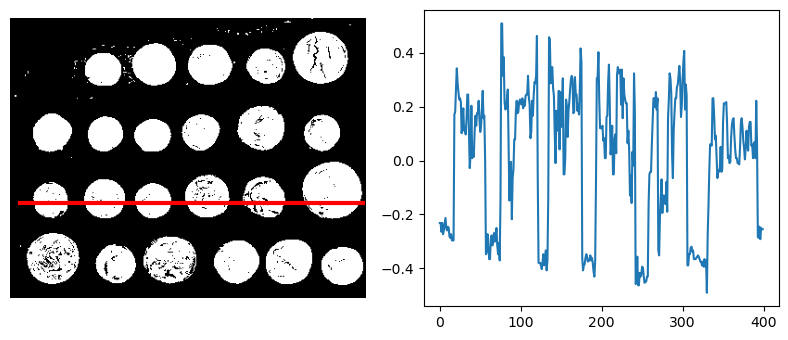

In [24]:


coins = data.coins()
mask = coins > filters.threshold_otsu(coins)
clean_border = segmentation.clear_border(mask).astype(int)
io.imsave('comparison/clean_border.png', clean_border)


coins_edges = segmentation.mark_boundaries(coins, clean_border)
x, y = [10, 383], 200
start, end = (x[0], y), (x[1], y)
test = intensity_profile(coins,start, end, 400)
test = test/np.max(test)
test = test-np.mean(test)


plt.figure(figsize=(8, 3.5))
plt.subplot(121)
plt.imshow(clean_border, cmap='gray')
plt.plot(x, [y,y], '-r', linewidth=3)  # Plot a red line across the middle

plt.axis('off')
plt.subplot(122)
plt.plot(test)

plt.tight_layout()
plt.show()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])